# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [1]:
# Import Liberaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [2]:
#Load the data set
data = pd.read_csv('wholesale_data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
# inspect the data shape to see how many rows and columns it contains
data.shape

(440, 8)

In [4]:
# learn more about the data, if there is a null value, what type of data type each column is
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
# inspect Channel column and see how many unique values in it 
data['Channel'].value_counts()

Channel
1    298
2    142
Name: count, dtype: int64

In [6]:
# inspect Region column and see how many unique values in it 
data['Region'].value_counts()

Region
3    316
1     77
2     47
Name: count, dtype: int64

In [7]:
# data statistics
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


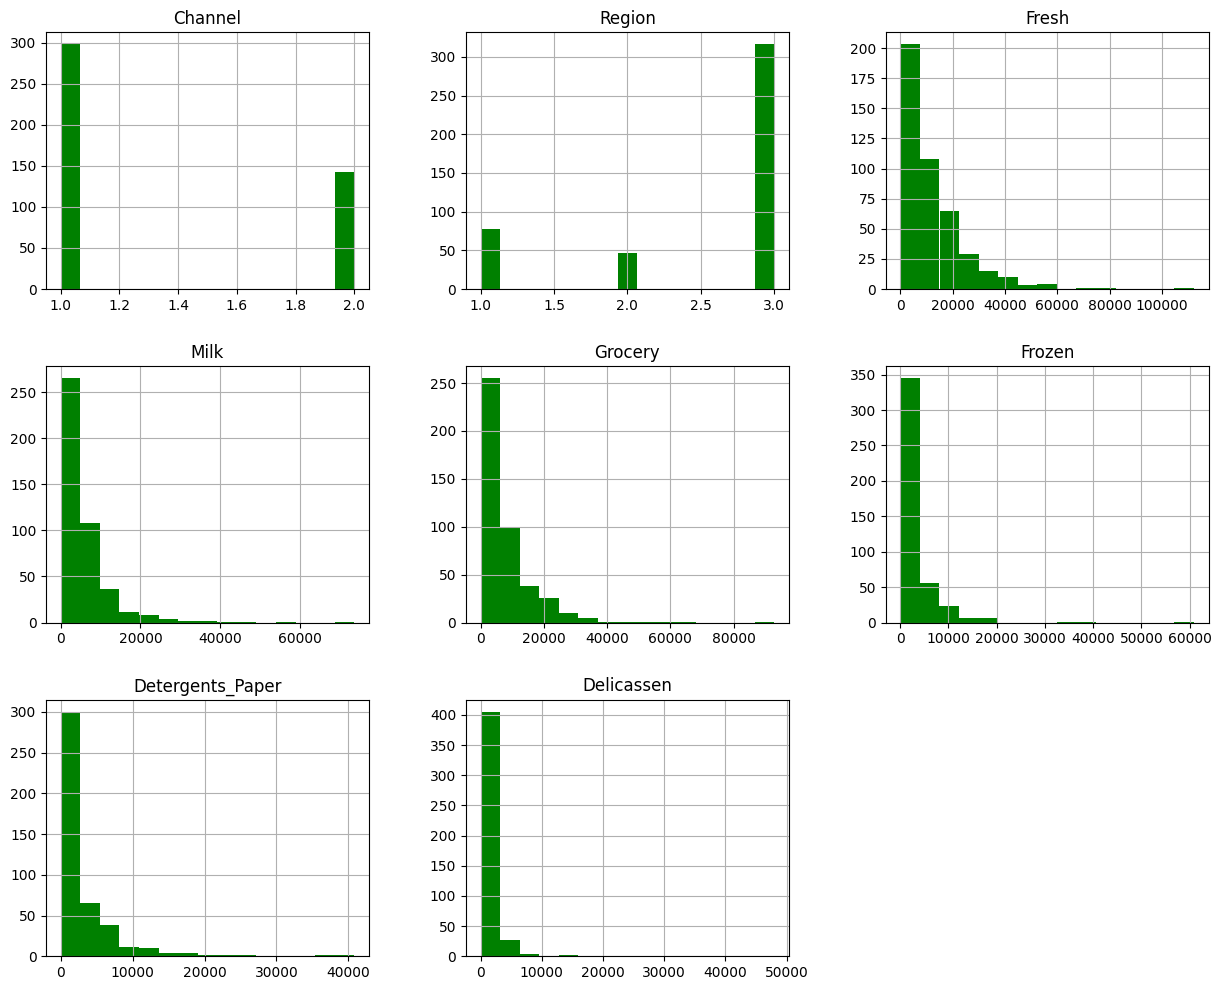

In [8]:
# Visualizing the data using hist
data.hist(figsize=(15,12),bins = 15, color = 'green')
plt.title("Features Name")
plt.show()

C:\Users\noora\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


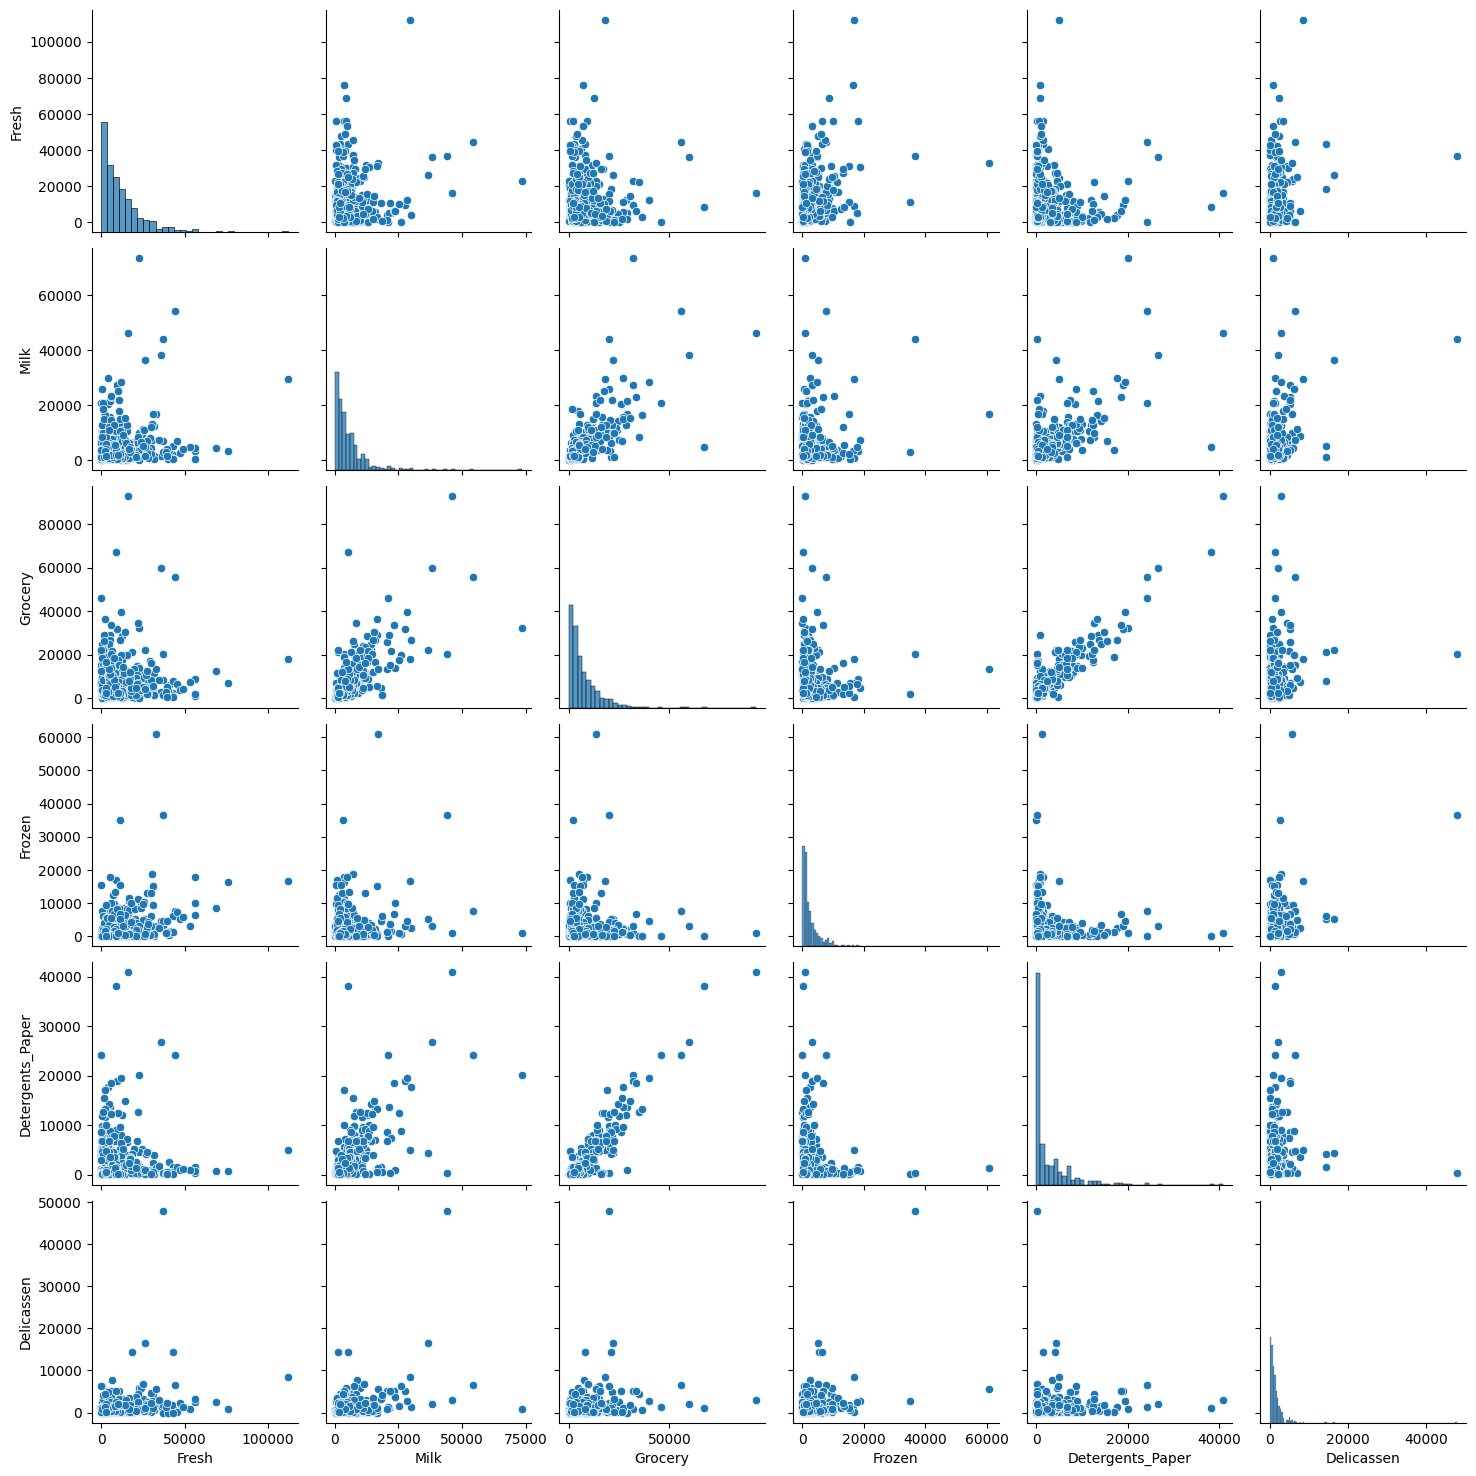

In [9]:
# Inspect if there is any relationshipe between all columns except for Channel and Region
sns.pairplot(data.drop(['Channel', 'Region'], axis =1))

It looks as if all columns has a positive correlation with each others. However, the relationship between Detergents, Milk and grocery are higher correclation then other columns. Customers intend to purchase these products more frequantly then others.

<Axes: >

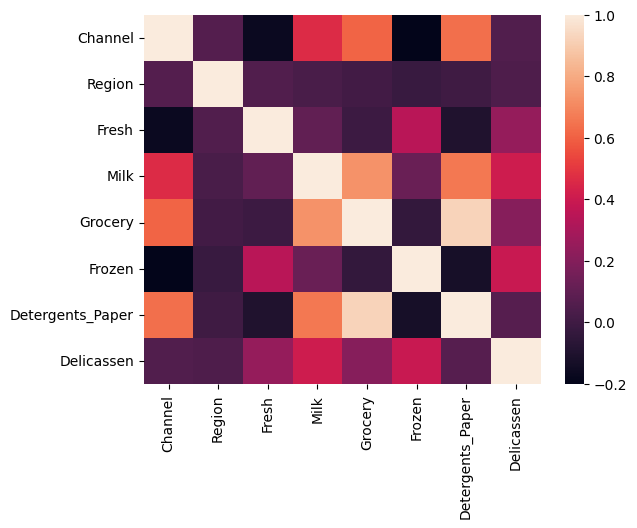

In [10]:
sns.heatmap(data.corr())

Looking for outlier in each columns, again excluding Channel and Region.

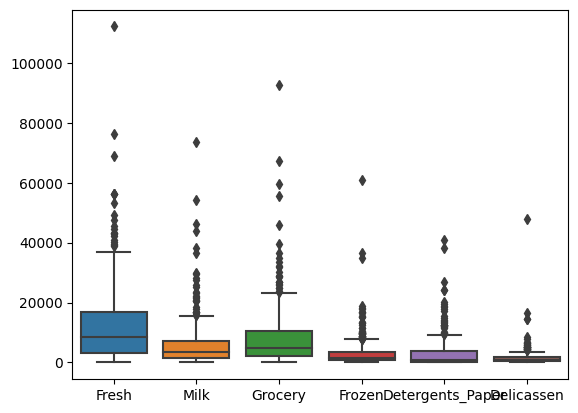

In [11]:
sns.boxplot(data.drop(['Channel', 'Region'], axis =1)) 
plt.show()

it looks like there are too many outliers.

Lets visualized these outlier more so we can have a clear pictures on how these outliers spreading

C:\Users\noora\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\noora\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\noora\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\noora\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\noora\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\noora\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


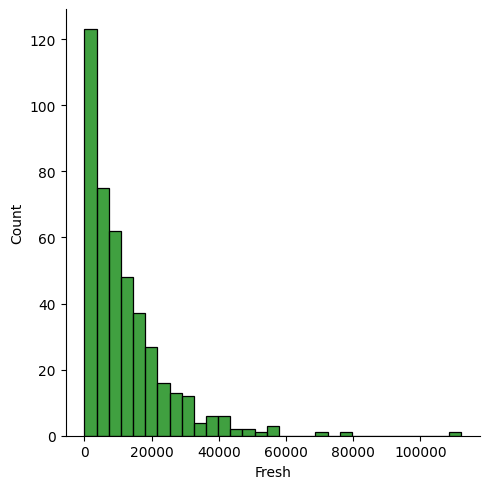

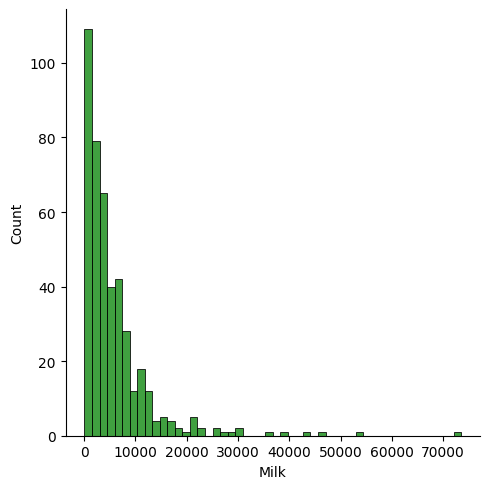

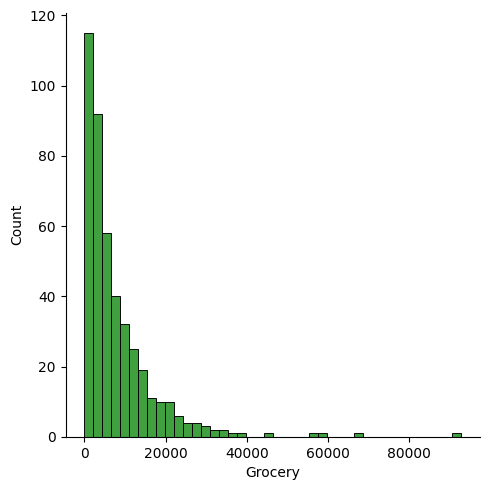

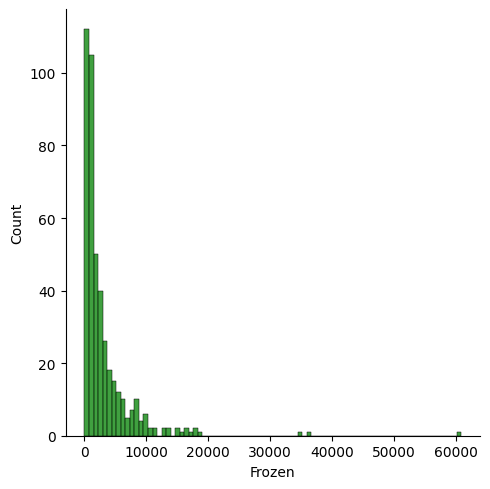

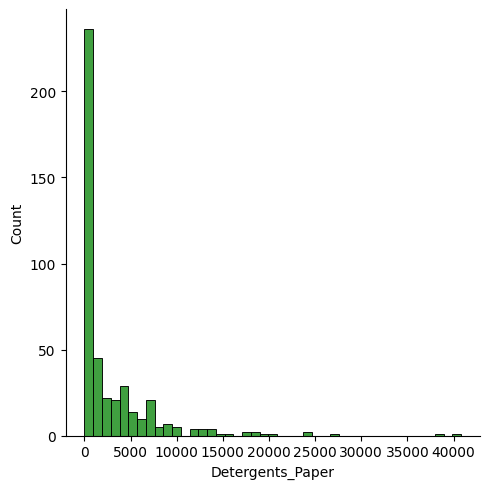

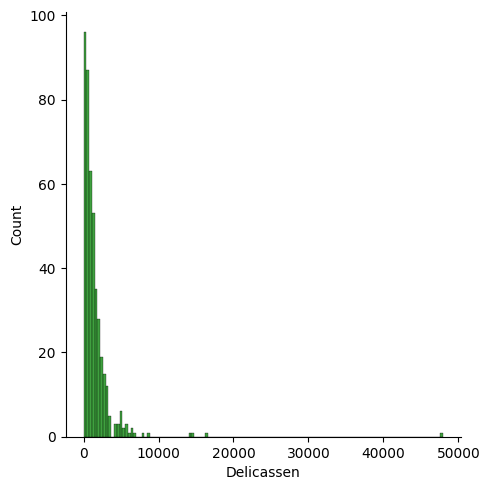

In [12]:
def seabornHist(data):
    for column in data:
        sns.displot(data[column], color ="green")
feature_variable = data.drop(['Channel', 'Region'], axis =1)
seabornHist(feature_variable)

WE will use IQR to remove the outliers from the dataset

In [13]:
# IQR the Delicassen column
Q1 = np.percentile(data['Delicassen'], 25, method='midpoint')
Q3 = np.percentile(data['Delicassen'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

1414.0


In [14]:
data_2 = data.drop(['Channel', 'Region'], axis = 1)

In [15]:
def outliers_insp (df):
    for col in df:
        q1=data[col].quantile(0.25)
        q3=data[col].quantile(0.75)
        IQR=q3-q1
        print(df[col].name,'IQE ', IQR)

In [16]:
outliers_insp(data_2)

Fresh IQE  13806.0
Milk IQE  5657.25
Grocery IQE  8502.75
Frozen IQE  2812.0
Detergents_Paper IQE  3665.25
Delicassen IQE  1412.0


Using the ubove values to drop all the outliers.

In [17]:
# function to eliminat the outliers
def drop_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   outliers_dropped = outliers.dropna().reset_index()
   return outliers_dropped

In [18]:
# ceating a new dataset without the outliers
data_2 =drop_outliers_IQR(data)

C:\Users\noora\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\noora\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\noora\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\noora\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\noora\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\noora\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\n

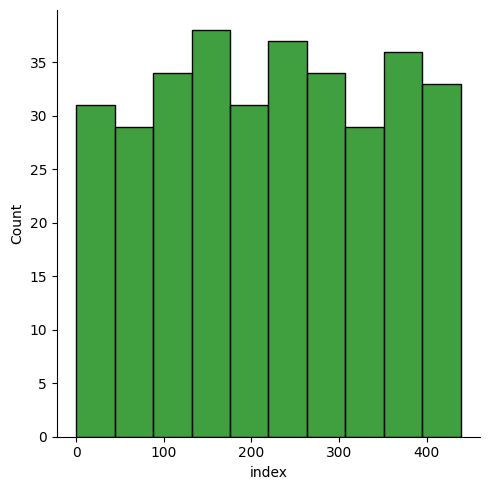

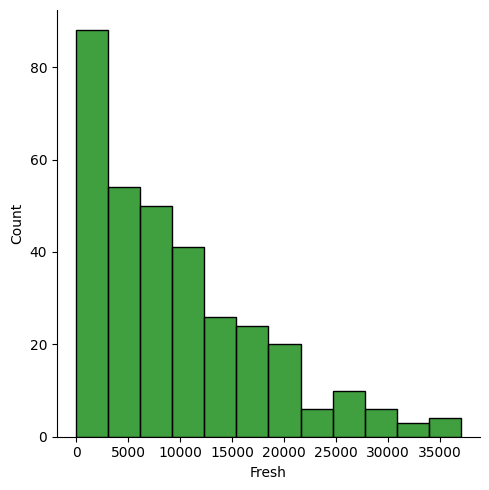

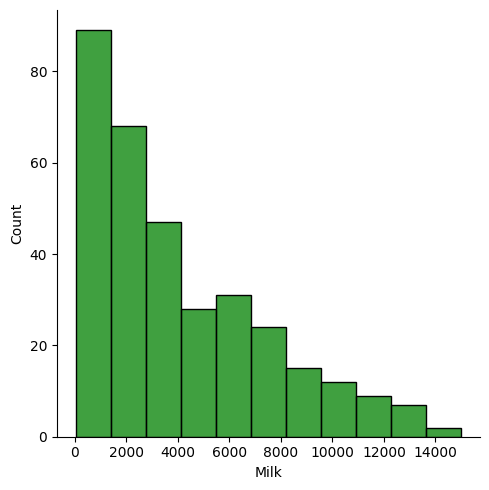

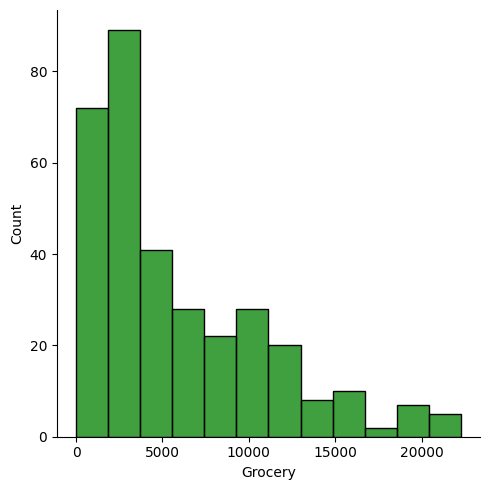

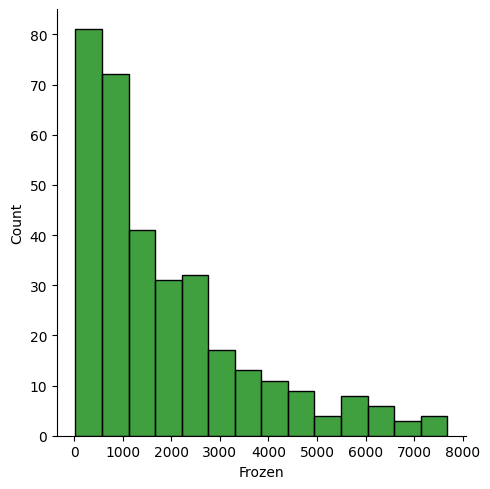

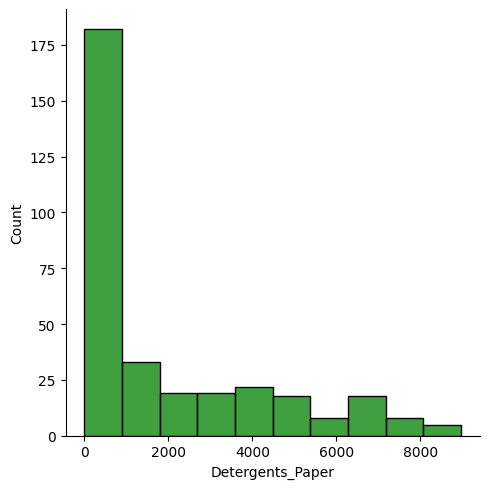

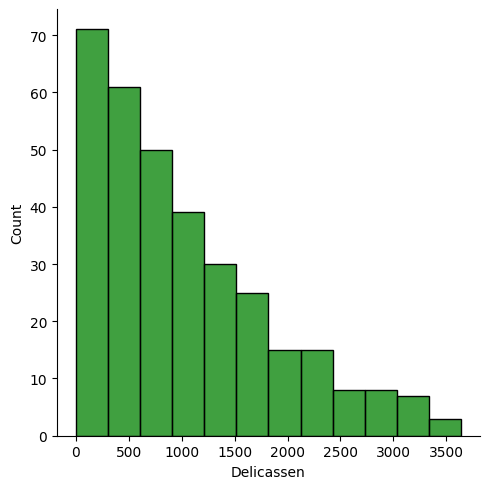

In [19]:
# visulized teh data without the outliers
feature_variable_2 = data_2.drop(['Channel', 'Region'], axis =1)
seabornHist(feature_variable_2)

<Axes: >

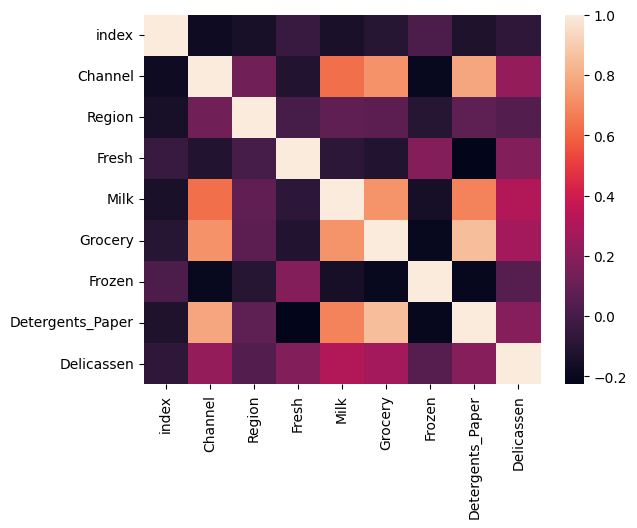

In [20]:
sns.heatmap(data_2.corr())

If we compare the heat map before cleaning the data and after, the data without the outlier looks more condense

Now the data looks clean and it doesn't have any more outliers.

Before start the modeling, I need to scale the data

In [21]:
scaler = StandardScaler()

In [22]:
df_train_scaled = pd.DataFrame(scaler.fit_transform(data_2))
df_train_scaled                               

,0,1,2,3,4,5,6,7,8
0,-1.765217,1.579474,0.590092,0.383041,1.652898,0.334978,-0.967004,0.305053,0.390465
1,-1.757238,1.579474,0.590092,-0.305588,1.698756,0.733878,-0.059255,0.569139,0.922591
2,-1.741278,-0.633122,0.590092,0.456174,-0.866283,-0.328862,2.662821,-0.619462,0.937169
3,-1.725319,1.579474,0.590092,-0.016491,1.236906,-0.148989,-0.701951,-0.069958,0.527749
4,-1.717339,1.579474,0.590092,0.316411,-0.269838,0.218508,-0.811022,0.503864,-0.572949
...,...,...,...,...,...,...,...,...,...
327,1.682008,-0.633122,0.590092,1.419665,-0.876407,-0.222926,-0.934752,-0.269195,-0.755184
328,1.689987,-0.633122,0.590092,-0.928323,-0.264181,-0.871064,-0.188850,-0.683883,0.525319
329,1.697967,-0.633122,0.590092,0.881474,-0.054547,0.421038,-0.689050,0.175783,-0.216984
330,1.729886,-0.633122,0.590092,0.091122,-0.632529,-0.724184,-0.483809,-0.764090,1.346590


In [23]:
print(df_train_scaled.columns)

RangeIndex(start=0, stop=9, step=1)


In [24]:
df_train_scaled.columns = data_2.columns
print(df_train_scaled.columns)

Index(['index', 'Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')


In [25]:
df_train_scaled

,index,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,-1.765217,1.579474,0.590092,0.383041,1.652898,0.334978,-0.967004,0.305053,0.390465
1,-1.757238,1.579474,0.590092,-0.305588,1.698756,0.733878,-0.059255,0.569139,0.922591
2,-1.741278,-0.633122,0.590092,0.456174,-0.866283,-0.328862,2.662821,-0.619462,0.937169
3,-1.725319,1.579474,0.590092,-0.016491,1.236906,-0.148989,-0.701951,-0.069958,0.527749
4,-1.717339,1.579474,0.590092,0.316411,-0.269838,0.218508,-0.811022,0.503864,-0.572949
...,...,...,...,...,...,...,...,...,...
327,1.682008,-0.633122,0.590092,1.419665,-0.876407,-0.222926,-0.934752,-0.269195,-0.755184
328,1.689987,-0.633122,0.590092,-0.928323,-0.264181,-0.871064,-0.188850,-0.683883,0.525319
329,1.697967,-0.633122,0.590092,0.881474,-0.054547,0.421038,-0.689050,0.175783,-0.216984
330,1.729886,-0.633122,0.590092,0.091122,-0.632529,-0.724184,-0.483809,-0.764090,1.346590


# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [26]:
#using data with outliers
df_train_scaled.keys()

Index(['index', 'Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [27]:
X = df_train_scaled[['Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']]

In [28]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

C:\Users\noora\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\noora\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3)

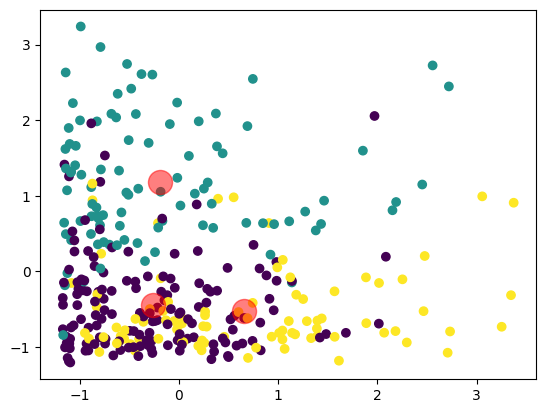

In [29]:
plt.scatter(X['Fresh'],X['Milk'], c=kmeans.labels_, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.5)
plt.show()

In [30]:
# to find teh cluster for each point
y_pred = kmeans.predict(X)
y_pred

array([1, 1, 2, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 2, 0, 2, 0,
       1, 0, 0, 2, 0, 1, 1, 2, 1, 1, 1, 1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 2,
       1, 2, 0, 1, 2, 0, 1, 2, 2, 0, 0, 0, 1, 1, 2, 0, 2, 2, 1, 0, 0, 0,
       0, 2, 1, 1, 1, 0, 0, 1, 1, 1, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0,
       1, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 2, 0, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       2, 0, 2, 1, 1, 0, 0, 2, 2, 1, 1, 2, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0,
       0, 0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 2, 2, 0, 0, 1, 0, 0, 2, 0, 0, 0,
       2, 0, 0, 2, 0, 2, 2, 0, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 1, 1, 2, 1, 2, 2, 0, 0, 2, 0, 0, 2, 2, 1, 0, 1, 0, 0, 0, 0,
       2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 2, 2, 0, 1, 0, 0, 0,
       0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 2, 0, 2, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 1, 2,

In [31]:
#copy labels_ attribute.
kmeans.labels_

array([1, 1, 2, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 2, 0, 2, 0,
       1, 0, 0, 2, 0, 1, 1, 2, 1, 1, 1, 1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 2,
       1, 2, 0, 1, 2, 0, 1, 2, 2, 0, 0, 0, 1, 1, 2, 0, 2, 2, 1, 0, 0, 0,
       0, 2, 1, 1, 1, 0, 0, 1, 1, 1, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0,
       1, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 2, 0, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       2, 0, 2, 1, 1, 0, 0, 2, 2, 1, 1, 2, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0,
       0, 0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 2, 2, 0, 0, 1, 0, 0, 2, 0, 0, 0,
       2, 0, 0, 2, 0, 2, 2, 0, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 1, 1, 2, 1, 2, 2, 0, 0, 2, 0, 0, 2, 2, 1, 0, 1, 0, 0, 0, 0,
       2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 2, 2, 0, 1, 0, 0, 0,
       0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 2, 0, 2, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 1, 2,

C:\Users\noora\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\noora\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\noora\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


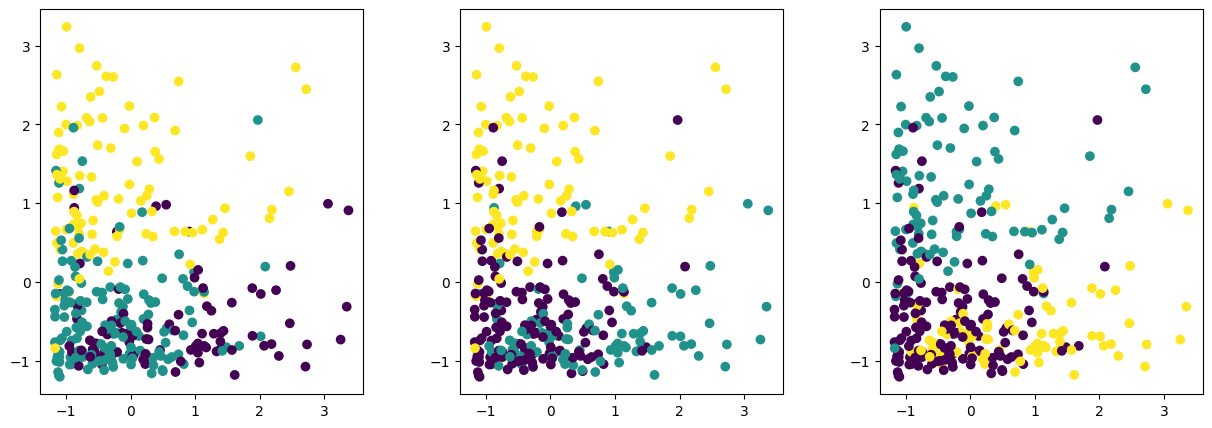

In [32]:
# Running K-means multiple times will give us different result as we picked the first k centroid randomly
fig, ax = plt.subplots(1, 3, gridspec_kw={'wspace': 0.3}, figsize=(15,5))
for i in range(3):
    kmeans = KMeans(n_clusters = 3, init='random', n_init=1, random_state=i)
    kmeans.fit(X)
    ax[i].scatter(x= X.iloc[:, 0], y=X.iloc[:, 1], c= kmeans.labels_);

From these three, I think the first one is better however we need to make sure it is the right one, so I will use inertia_ attribute

C:\Users\noora\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\noora\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\noora\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


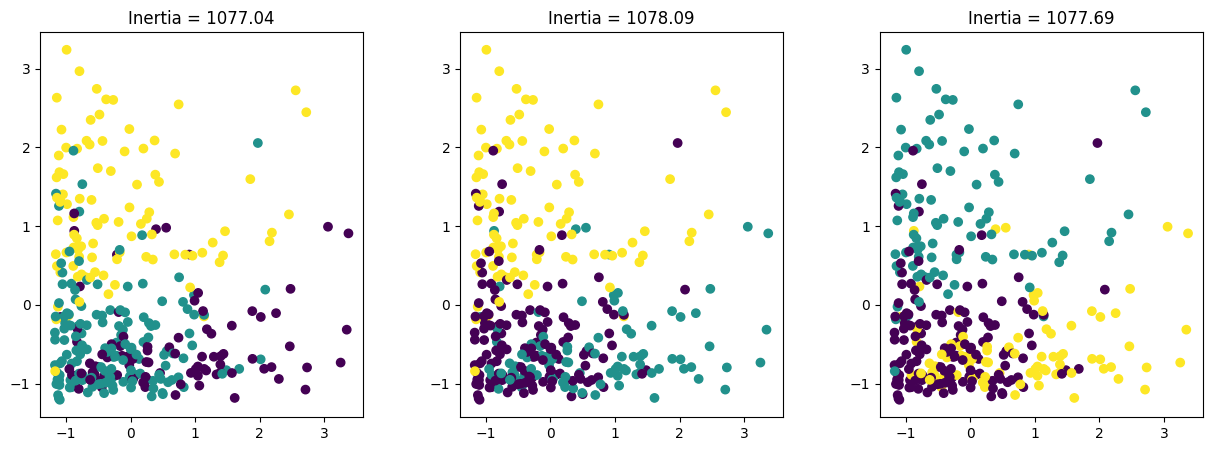

In [33]:
fig, ax = plt.subplots(1, 3, gridspec_kw={'wspace': 0.3}, figsize=(15,5))
for i in range(3):
    kmeans = KMeans(n_clusters = 3, init='random', n_init=1, random_state=i)
    kmeans.fit(X)
    ax[i].scatter(x= X.iloc[:, 0], y=X.iloc[:, 1], c= kmeans.labels_)
    ax[i].set_title(f"Inertia = {round(kmeans.inertia_, 2)}");

The plot with loset inertia is the good one which in our case is the first one

To find teh optimal number of cluser we will use the elbo method, first we will calculate teh inertia for different numbers of clusters

In [34]:
#Within cluster sum squares
seed =0
wcss = []
for i in range(2,10):
    kmeans = KMeans(n_clusters= i, random_state=seed)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\noora\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\noora\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\noora\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\noora\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [35]:
wcss

[1303.1342611098144,
 1077.0435334708043,
 920.6120391850388,
 815.9822078803211,
 743.2115545963634,
 687.0159575802401,
 650.423823776156,
 614.6277546037082]

ploting the inertia

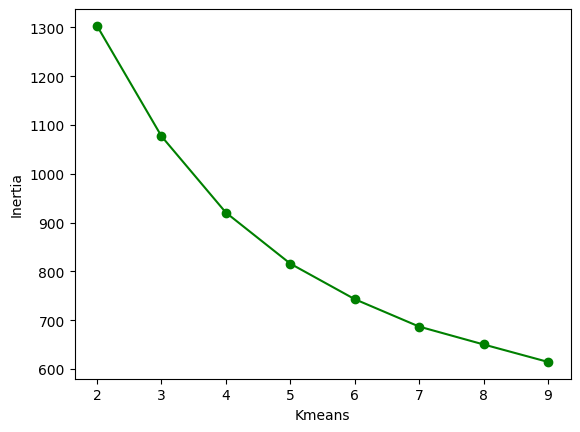

In [36]:
plt.plot(range(2,10), wcss, 'og-')
plt.annotate('Elbow', xy=(5, 50000), xytext=(6, 100000), arrowprops=dict(facecolor='Blue', shrink=0.05))
plt.xlabel("Kmeans")
plt.ylabel("Inertia");

from the inertia we found that k=4
is the optimal number of clusters

C:\Users\noora\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\noora\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Text(0, 0.5, 'Milk')

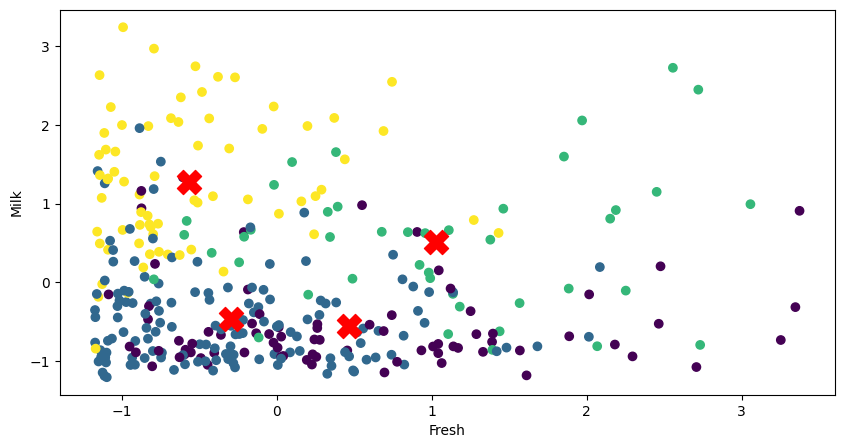

In [37]:
#from the graph k=6 is the optimal number of clusters
kmeans = KMeans(n_clusters = 4, random_state=seed)
kmeans.fit(X)

plt.figure(figsize=(10,5))
scatter = plt.scatter(x= X.iloc[:, 0], y=X.iloc[:, 1], c= kmeans.labels_)
# plt.scatter(x= X['Fresh'], y=X['Milk'], c= km.labels_)
# scatter = plt.scatter(x= X[:, 0], y=X[:, 1], c= kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], marker="X", color='r', s=300)
plt.xlabel('Fresh')
plt.ylabel('Milk')
# plt.legend(handles=scatter.legend_elements()[0], labels=[0, 1, 2, 3, 4,5])

I will use a differnt method to find the best cluster number, I will use the sillhoutte scores

In [38]:
from sklearn.metrics import silhouette_samples, silhouette_score
sil_scores = [] 
for i in range(3,10):
    km = KMeans(n_clusters= i, random_state=seed)
    km.fit(X)
    sil_scores.append(silhouette_score(X, km.labels_))

C:\Users\noora\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\noora\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\noora\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\noora\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

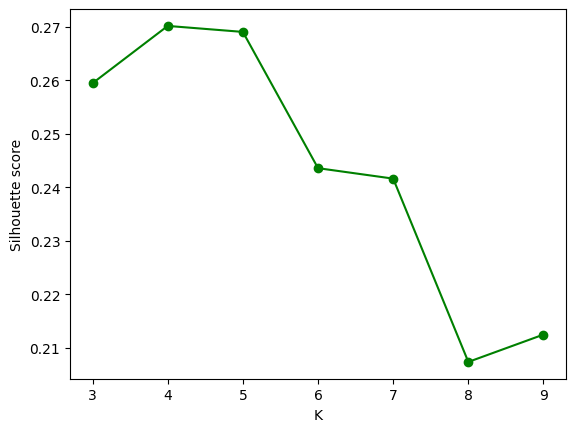

In [39]:
plt.plot(range(3,10), sil_scores, 'og-')
plt.annotate('Elbow', xy=(5, 500), xytext=(6, 1000), arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel("K")
plt.ylabel("Silhouette score");

This method confirmed to us that is a very good choice k=4.

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

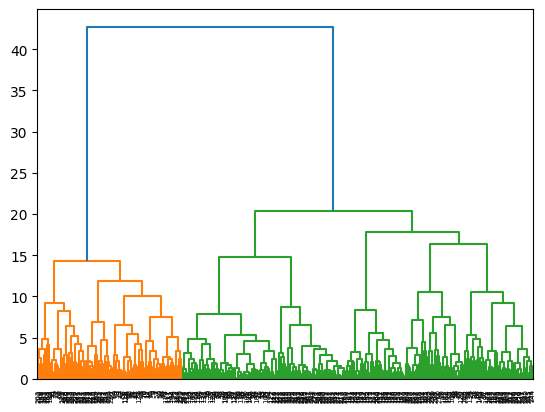

In [40]:
from sklearn.preprocessing import normalize

#normalized the data
normalized_data = normalize(df_train_scaled)
#create a dendrogrm
dendrogram = sch.dendrogram(sch.linkage(df_train_scaled, method='ward'))

In [41]:
#preform the actual clusterin
hc = AgglomerativeClustering(n_clusters= 4, affinity = 'euclidean', linkage='ward')

In [42]:
y_hc = hc.fit_predict(normalized_data)

C:\Users\noora\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


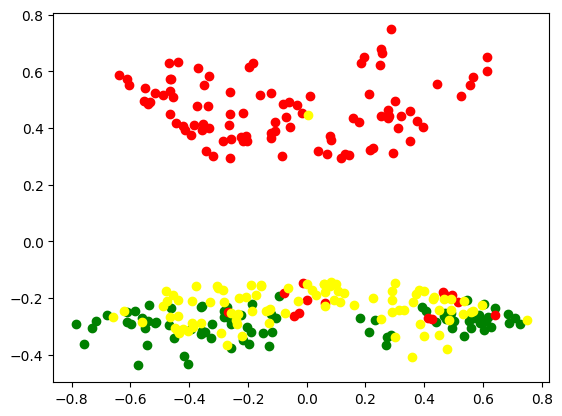

In [43]:
plt.scatter(normalized_data[y_hc== 0, 0], normalized_data[y_hc == 0, 1], c = 'green')
plt.scatter(normalized_data[y_hc== 1, 0], normalized_data[y_hc == 1, 1], c = 'red')
plt.scatter(normalized_data[y_hc== 2, 0], normalized_data[y_hc == 2, 1], c = 'yellow')
#plt.scatter(normalized_data[y_hc== 3, 0], normalized_data[y_hc == 3, 1], c = 'blue')

#plt.scatter()

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [44]:
data_2.keys()

Index(['index', 'Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [45]:
predictor_variable = data_2[['Fresh', 'Milk', 'Frozen',
       'Detergents_Paper', 'Delicassen']]

In [46]:
#First we need to perform Preprocessing and remove the target from the training set
scaler = StandardScaler()
X =data_2.drop(['index','Region','Channel','Grocery'],axis=1)
y = data_2['Grocery']
X = scaler.fit_transform(X)
dfx = pd.DataFrame(data=X,columns=predictor_variable.columns)
dfx.head(10)

,Fresh,Milk,Frozen,Detergents_Paper,Delicassen
0,0.383041,1.652898,-0.967004,0.305053,0.390465
1,-0.305588,1.698756,-0.059255,0.569139,0.922591
2,0.456174,-0.866283,2.662821,-0.619462,0.937169
3,-0.016491,1.236906,-0.701951,-0.069958,0.527749
4,0.316411,-0.269838,-0.811022,0.503864,-0.572949
5,-0.241535,0.253353,-0.113790,0.581085,1.882360
6,-0.439829,-0.136137,-0.843274,-0.103662,-0.323895
7,-0.434552,2.080802,-0.412855,2.331989,1.313788
8,-0.758497,0.386459,1.487672,1.714224,0.883714
9,0.441572,-0.887723,-0.259804,-0.601543,-0.631264


In [47]:
pca = PCA(n_components=None)
dfx_pca = pca.fit(dfx)

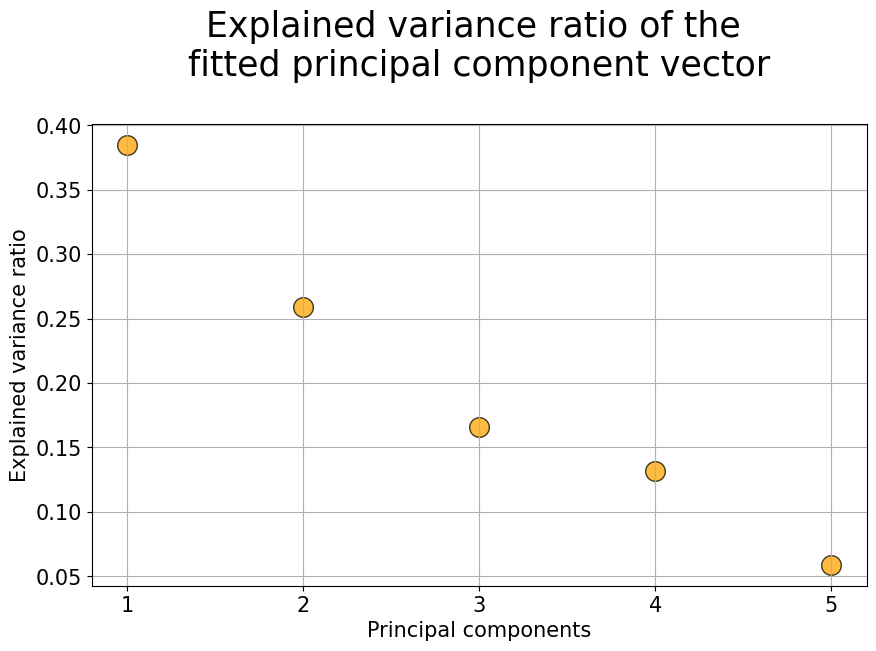

In [48]:
#The explained variance tells you how much information (variance) can be attributed to each of the principal components
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

we can see that the first principal component make 38%, and pribnciple component two make around 26% so together they will make 64%.

In [49]:
# variance ration
pca.explained_variance_ratio_

array([0.38480341, 0.25901695, 0.165653  , 0.13147968, 0.05904697])

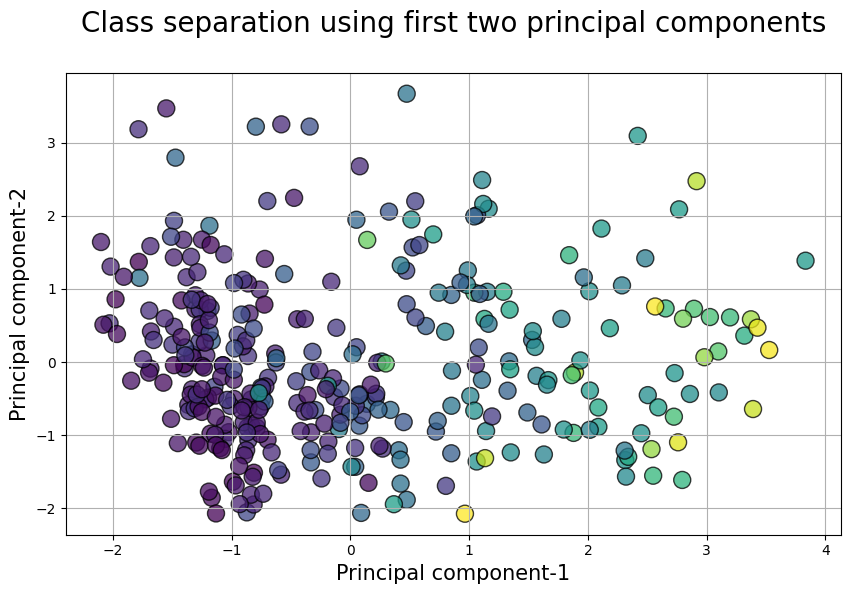

In [50]:
# we will use only the first two component in out training
dfx_trans = pca.transform(dfx)
dfx_trans = pd.DataFrame(data=dfx_trans)

plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[0],dfx_trans[1],c=data_2['Grocery'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

EDA: During the EDA process, I noticed the following

1- There is a positive correlation between grocery column and milk, fresh, frozen, detergen_paper and Delicassen, that means each trip the customer make, there is a combination of these items. 

2- Using unsupervised machine learnign can help show into how many group combinations of these items can be divided.

3- EDA made it clear of the outliers, so before starting the traing I removed all the outliers.

4- Removing the channel and teh region columns helped with make the relationship between all product more clear using teh pairplot

__________________________________________

KMean:

1- Using KMeans, I started with three clustering groups however using the inertia score showed that it is best to make the clustering into 6 groups.

2- To confirm the findings, I used the silhouette score which it gave the same the results.

3- from the result, it means that all the shoppers can be divided into six groups and that depends on the type of items they purchase for each shopping trip.

_______________________________________

PCA:

1- I used five product which they are 'Fresh', 'Milk', 'Frozen', 'Detergents_Paper', and 'Delicassen. From processing the data, it is appearent that the first two component combined make 64% of the variance ratio

2- Using the previous information, we used only the first two component in out training